In [1]:
import numpy as np

def gaussian_2d(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    """
    Calculates the value of a 2D Gaussian distribution.

    Args:
        x (float): x-coordinate.
        y (float): y-coordinate.
        mu_x (float): Mean in the x-direction.
        mu_y (float): Mean in the y-direction.
        sigma_x (float): Standard deviation in the x-direction.
        sigma_y (float): Standard deviation in the y-direction.
        rho (float): Correlation coefficient between x and y.

    Returns:
        float: The value of the 2D Gaussian at (x, y).
    """
    # Denominator for the exponent
    denominator_exp = 2 * (1 - rho**2)

    # Calculate the exponent term (z)
    term1 = (x - mu_x)**2 / sigma_x**2
    term2 = 2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)
    term3 = (y - mu_y)**2 / sigma_y**2
    z = term1 - term2 + term3

    # Calculate the overall pre-factor
    pre_factor = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))

    # Return the 2D Gaussian value
    return pre_factor * np.exp(-z / denominator_exp)

# Parameters for the 2D Gaussian
mu_x = 0
mu_y = 0
sigma_x = 1.5
sigma_y = 1.5
rho = 0.5  # Correlation coefficient

# Define the grid size
num_pixels_x = 512
num_pixels_y = 512

# Create a grid for the x and y values for the Gaussian calculation
# The actual domain (-5 to 5) should be used for the Gaussian function,
# even if the output array maps to pixel indices.
x_domain = np.linspace(-5, 5, num_pixels_x)
y_domain = np.linspace(-5, 5, num_pixels_y)
X, Y = np.meshgrid(x_domain, y_domain)

# Calculate the Z values (float) for the 2D Gaussian
Z = gaussian_2d(X, Y, mu_x, mu_y, sigma_x, sigma_y, rho)

# Apply the rotation as done in the original plotting code
Z_rotated = np.rot90(Z, k=1)

# --- Convert the float Z array to an 8-bit unsigned integer array (0-255) ---

# 1. Normalize the Z_rotated array to the range [0, 1]
# Find the minimum and maximum values in the rotated array
min_val = np.min(Z_rotated)
max_val = np.max(Z_rotated)

# Avoid division by zero if the array is flat (all values are the same)
if max_val == min_val:
    # If all values are the same, make it a uniform gray image (e.g., mid-gray)
    normalized_Z = np.full_like(Z_rotated, 0.5)
else:
    normalized_Z = (Z_rotated - min_val) / (max_val - min_val)

# 2. Scale to [0, 255] and convert to uint8
Z = (normalized_Z * 255).astype(np.uint8)


# You can optionally save this array as an image file (e.g., PNG)
# using libraries like Pillow (PIL) or OpenCV (cv2) if you want to visualize it
# Example with Pillow:
# from PIL import Image
# img = Image.fromarray(gaussian_image_array, 'L') # 'L' mode for 8-bit grayscale
# img.save('2d_gaussian_8bit.png')
# print("Saved '2d_gaussian_8bit.png'")

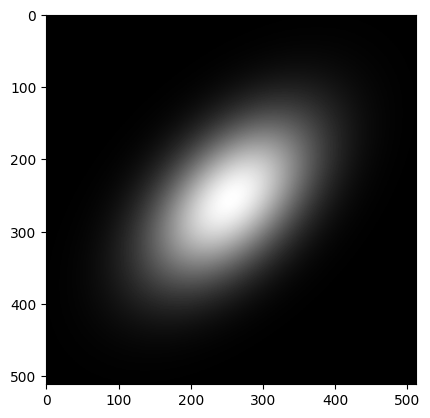

In [2]:
import utils
utils.imshow(Z)

In [3]:
from PIL import Image
img = Image.fromarray(Z, 'L') # 'L' mode for 8-bit grayscale
img.save('2d_gaussian.png')


In [4]:
try:
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mticker

# apt install cm-super-minimal
# apt install dvipng
plt.rcParams.update({
    "text.usetex": True,
    #"font.family": "Helvetica",
    "font.family": "Serif",
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amsfonts}"
})

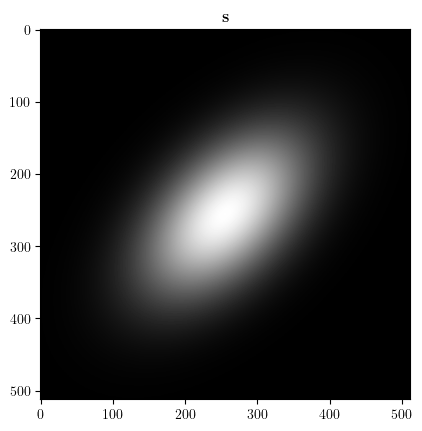

In [6]:
plt.title(r"$\mathbf{s}$")
#plt.imshow(utils.equalize_grayscale_image(Z), cmap="gray")
plt.imshow(Z, cmap="gray")
plt.savefig('2d_gaussian.pdf', bbox_inches='tight', pad_inches=0)